<a href="https://colab.research.google.com/github/ojas12r/23FE10CSE00709_OJAS-RAGHAV/blob/main/LAB%201%20%26%20LAB%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade hmmlearn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from hmmlearn.hmm import GaussianHMM


In [ ]:
# Download data
symbol = "SPY"   # You can say: "This can be extended to other assets"
data = yf.download(symbol, start="2015-01-01", end="2024-01-01")

# Use closing price
price = data["Close"]


/tmp/ipython-input-150282765.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Log returns
returns = np.log(price / price.shift(1))
returns = returns.dropna()

# Prepare for HMM (2D array)
X = returns.values.reshape(-1, 1)



In [ ]:
# HMM with 3 hidden states
model = GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
    random_state=42
)

model.fit(X)


GaussianHMM(covariance_type='full', n_components=3, n_iter=1000,
            random_state=42)

In [ ]:
df = pd.DataFrame(
    {
        "Price": price.loc[returns.index].values.ravel(),
        "Returns": returns.values.ravel(),
        "Regime": hidden_states.ravel()
    },
    index=returns.index
)


In [ ]:
for i in range(model.n_components):
    mean = model.means_[i][0]
    var = model.covars_[i][0][0]
    print(f"Regime {i}")
    print(f"  Mean Return : {mean:.5f}")
    print(f"  Volatility  : {np.sqrt(var):.5f}")
    print("-" * 30)


Regime 0
  Mean Return : 0.00123
  Volatility  : 0.00774
------------------------------
Regime 1
  Mean Return : 0.00079
  Volatility  : 0.00804
------------------------------
Regime 2
  Mean Return : -0.00196
  Volatility  : 0.02198
------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


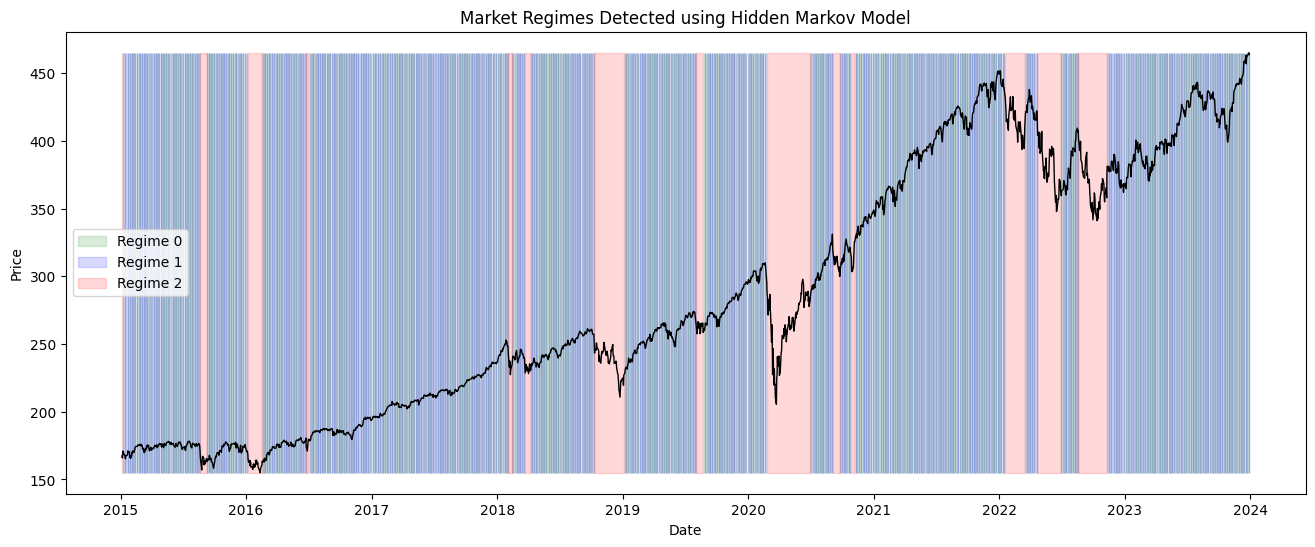

In [ ]:
colors = {0: "green", 1: "blue", 2: "red"}

plt.figure(figsize=(16, 6))
plt.plot(df.index, df["Price"], color="black", linewidth=1)

for regime in colors:
    plt.fill_between(
        df.index,
        df["Price"].min(),
        df["Price"].max(),
        where=(df["Regime"] == regime),
        color=colors[regime],
        alpha=0.15,
        label=f"Regime {regime}"
    )

plt.title("Market Regimes Detected using Hidden Markov Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
